#### **MBD 2022-2023**
# **Fundamentals of Deep Learning**
# **By Arunkkumar Karthikeyan, Maria Karakoulian, Priya Yadav**
## **Final Project**


In [1]:
# Importing required libraries

!pip install keras_applications
!pip install lime
!pip install shap
!pip install innvestigate

import keras
import shap
import numpy as np
import pandas as pd
import innvestigate
from PIL import Image
from glob import iglob
from skimage import io
import tensorflow as tf
import tensorflow.compat.v1.keras.backend as K
tf.compat.v1.disable_eager_execution()
from matplotlib import cm
from keras.models import Model
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.datasets import reuters
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from matplotlib.colors import rgb2hex
import matplotlib.gridspec as gridspec
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from sklearn.datasets import load_sample_image
from sklearn.preprocessing import minmax_scale
from tensorflow.keras.constraints import NonNeg
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.utils import to_categorical, pad_sequences
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Layer, Dense, Embedding, LSTM, GRU, Flatten, SimpleRNN, Bidirectional, Attention, TimeDistributed, Conv1D, Conv2D, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D, MaxPooling2D, AveragePooling2D, MaxPooling1D, GlobalMaxPooling1D, Input, concatenate, dot, Lambda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 2.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=ace95fdac76e911221a1c1365a1e21bee8bda749d7dced9698b0fa9194c7a9ed
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#CHECK GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
!wget https://github.com/mghatee/Accident-Images-Analysis-Dataset/blob/master/Accident%20Images%20Analysis%20Dataset.rar?raw=true -O data.rar

--2023-03-24 13:21:50--  https://github.com/mghatee/Accident-Images-Analysis-Dataset/blob/master/Accident%20Images%20Analysis%20Dataset.rar?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mghatee/Accident-Images-Analysis-Dataset/raw/master/Accident%20Images%20Analysis%20Dataset.rar [following]
--2023-03-24 13:21:51--  https://github.com/mghatee/Accident-Images-Analysis-Dataset/raw/master/Accident%20Images%20Analysis%20Dataset.rar
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mghatee/Accident-Images-Analysis-Dataset/master/Accident%20Images%20Analysis%20Dataset.rar [following]
--2023-03-24 13:21:51--  https://raw.githubusercontent.com/mghatee/Accident-Images-Analysis-Dataset/master/Accident%20Images%20Analysis%20Dataset.rar
Resolving ra

In [4]:
!unrar x -o+ -y -inul data.rar

In [5]:
# Getting the images from the basepath
basepath = 'Accident Images Analysis Dataset/'

def prepare_images(path, num_classes,  load_img_kwargs={}, ext='.jpg'):
  X, y = [], []
  for class_ in range(num_classes):
    for img_path in iglob(path + str(class_ + 1) + '/' + '*' + ext):
      img = image.load_img(img_path, **load_img_kwargs)
      x = image.img_to_array(img)
      X.append(x)
      y.append(class_)
  return np.array(X), np.array(y)

In [6]:
# Load all images as train and test set
X, y = prepare_images(basepath + 'Vehicles-in-Accidents/', 3,  load_img_kwargs={'target_size': (224, 224)})

len(X), len(y), np.unique(y)

(2636, 2636, array([0, 1, 2]))

**EXERCISE 1: VEHICLES-IN-ACCIDENTS DATA**

**1A. DATA EXTRACTION**

In [ ]:
#Reference: https://cloudxlab.com/assessment/displayslide/2533/numpy-arrays-example-reshaping-a-complex-array

In [7]:
# Checking for the shape of the image
print(X.shape)

(2636, 224, 224, 3)


In [8]:
# Splitting the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train.shape

(1845, 224, 224, 3)

In [9]:
num_classes= 3

y_train= to_categorical(y_train, num_classes)
y_test= to_categorical(y_test, num_classes)
print(y_train)
print(y_test)

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


**1B. MULTI-LAYER PERCEPTRON NETWORKS**

In [ ]:
 # Converting the image to grayscale 
image_grayscale_train = X_train.mean(axis=3).astype('float32')
image_grayscale_test = X_test.mean(axis=3).astype('float32')
image_grayscale_train.shape
image_grayscale_test.shape

(791, 224, 224)

In [ ]:
# Scaling the grayscale images
image_grayscale_train/=255
image_grayscale_test/=255
print(image_grayscale_train)
print(image_grayscale_test)

[[[0.9764706  0.9764706  0.9764706  ... 0.4261438  0.4261438  0.4261438 ]
  [0.9764706  0.9764706  0.9764706  ... 0.4261438  0.4261438  0.4261438 ]
  [0.9764706  0.9764706  0.9764706  ... 0.4261438  0.4261438  0.4261438 ]
  ...
  [0.28627452 0.28627452 0.28627452 ... 0.5346405  0.5346405  0.5346405 ]
  [0.28627452 0.28627452 0.28627452 ... 0.5346405  0.5346405  0.5346405 ]
  [0.28627452 0.28627452 0.28627452 ... 0.5346405  0.5346405  0.5346405 ]]

 [[0.9006536  0.9006536  0.9006536  ... 0.83006537 0.83006537 0.83006537]
  [0.9006536  0.9006536  0.9006536  ... 0.83006537 0.83006537 0.83006537]
  [0.9006536  0.9006536  0.9006536  ... 0.83006537 0.83006537 0.83006537]
  ...
  [0.6562091  0.6562091  0.6562091  ... 0.8653595  0.8653595  0.8653595 ]
  [0.6562091  0.6562091  0.6562091  ... 0.8653595  0.8653595  0.8653595 ]
  [0.6562091  0.6562091  0.6562091  ... 0.8653595  0.8653595  0.8653595 ]]

 [[0.6169934  0.6169934  0.6169934  ... 0.7359477  0.7359477  0.7359477 ]
  [0.6169934  0.616993

In [ ]:
# Define MLP1 with two hidden layers of 64 neurons each and with activation function of relu for Dense layer and softmax function for output layer
mlp1 = Sequential([
    Flatten(input_shape=(224, 224)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Define MLP2 with four hidden layers of 128 neurons each and with activation function of relu for Dense layer and softmax function for output layer
mlp2 = Sequential([
    Flatten(input_shape=(224, 224)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Define MLP3 with two hidden layers of 256 neurons each and with activation function of relu for Dense layer and softmax function for output layer
mlp3 = Sequential([
    Flatten(input_shape=(224, 224)),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

mlp1.summary()
mlp2.summary()
mlp3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 50176)             0         
                                                                 
 dense_14 (Dense)            (None, 64)                3211328   
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 3)                 195       
                                                                 
Total params: 3,215,683
Trainable params: 3,215,683
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten) 

In [ ]:
# Compile the models with categorical cross-entropy loss and adam optimizer

mlp1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mlp2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mlp3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size  = 32
epochs      = 10

mlp1_history = mlp1.fit(image_grayscale_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(image_grayscale_test, y_test))
mlp2_history = mlp2.fit(image_grayscale_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(image_grayscale_test, y_test))
mlp3_history = mlp3.fit(image_grayscale_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(image_grayscale_test, y_test))

Epoch 1/10
58/58 [==============================] - 2s 15ms/step - loss: 2.3193 - accuracy: 0.4282 - val_loss: 1.2464 - val_accuracy: 0.4362
Epoch 2/10
58/58 [==============================] - 0s 8ms/step - loss: 1.2505 - accuracy: 0.4943 - val_loss: 1.7301 - val_accuracy: 0.4779
Epoch 3/10
58/58 [==============================] - 1s 9ms/step - loss: 1.1136 - accuracy: 0.5745 - val_loss: 1.1536 - val_accuracy: 0.4930
Epoch 4/10
58/58 [==============================] - 0s 8ms/step - loss: 1.0255 - accuracy: 0.5664 - val_loss: 0.9879 - val_accuracy: 0.5322
Epoch 5/10
58/58 [==============================] - 0s 8ms/step - loss: 0.9016 - accuracy: 0.5995 - val_loss: 0.9638 - val_accuracy: 0.5550
Epoch 6/10
58/58 [==============================] - 1s 9ms/step - loss: 0.9179 - accuracy: 0.5837 - val_loss: 1.1623 - val_accuracy: 0.5297
Epoch 7/10
58/58 [==============================] - 1s 10ms/step - loss: 0.8480 - accuracy: 0.6217 - val_loss: 0.9503 - val_accuracy: 0.5525
Epoch 8/10
58/58 [

In [ ]:
# Train history
histories = [mlp1_history, mlp2_history, mlp3_history]

# Model names
model_names = ['MLP1', 'MLP2', 'MLP3']

# Create a dataframe for the train and validation history
results = pd.DataFrame(columns=['Model', 'Train Acc.', 'Test Acc.', 'Train Loss', 'Test Loss'])

# Populate the results dataframe
for i, model_name in enumerate(model_names):
    train_acc = histories[i].history['accuracy'][-1]
    test_acc = histories[i].history['val_accuracy'][-1]
    train_loss = histories[i].history['loss'][-1]
    test_loss = histories[i].history['val_loss'][-1]
    results.loc[i] = [model_name, train_acc, test_acc, train_loss, test_loss]

print(results)

  Model  Train Acc.  Test Acc.  Train Loss  Test Loss
0  MLP1    0.615718   0.548673    0.853076   1.012708
1  MLP2    0.595122   0.527181    0.862685   0.958125
2  MLP3    0.637398   0.554994    0.824424   0.986209


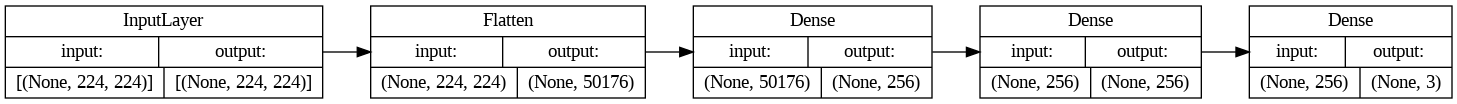

In [ ]:
# Generate a visualization of the connections in the MLP3 architecture
plot_model(mlp3, show_shapes=True, show_layer_names=False, rankdir='LR', to_file='mlp3_connections.png')

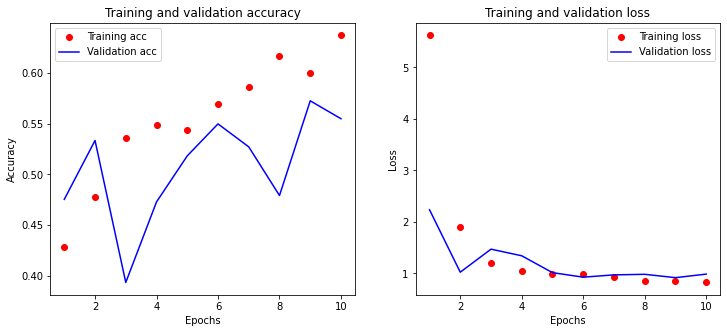

In [ ]:
# Define training and validation metrics for MLP3
acc = [0.4287, 0.4780, 0.5355, 0.5485, 0.5442, 0.5691, 0.5859, 0.6168, 0.6005, 0.6374]
val_acc = [0.4753, 0.5335, 0.3932, 0.4728, 0.5183, 0.5499, 0.5272, 0.4791, 0.5727, 0.5550]
loss = [5.6217, 1.9054, 1.1944, 1.0560, 0.9934, 0.9922, 0.9270, 0.8539, 0.8575, 0.8244]
val_loss = [2.2357, 1.0234, 1.4708, 1.3418, 1.0147, 0.9269, 0.9714, 0.9824, 0.9174, 0.9862]
epochs = range(1, 11)

# Plot the graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Accuracy plot
ax1.plot(epochs, acc, 'ro', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss plot
ax2.plot(epochs, loss, 'ro', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

**INTERPRETATION OF MLP MODEL RESULTS**

1. For the MLP model, we used three Sequential models starting with  

  - Three Dense layers, the first two with 64 neurons each, and the last with 3 neurons and softmax activation.
  - Five Dense layers, the first four with 128 neurons each, and the last with 3 neurons and softmax activation. 
  - Three Dense layers, the first two with 256 neurons each, and the last with 3 neurons and softmax activation. 

2. We used the Categorical cross-entropy loss function (which is used for multi-class classification problems) and the Adam optimizer.

3. And then we compared the results of all three MLP models with train set, validation set and Test set.

4. We can say that the MLP3 model has the highest training accuracy of **0.637** and also the highest validation accuracy of **0.554**. This suggests that MLP3 is the best performing model among the three. However, we should note that we might need to improve the model further, as the validation accuracy is still relatively low, indicating that the model might be overfitting the training data.

5. We can also see that as the model complexity increases (i.e., from MLP1 to MLP3), the training loss decreases, indicating that the model is learning better representations of the data. However, this is not reflected in the validation loss, which remains relatively high. This indicates that the models might be overfitting the training data and not generalizing well to unseen data.

6. Finally, we can see that the test accuracy is lower than the training and validation accuracy for all the models. This might be expected since the models have not seen the test data during training and might not generalize well to it. 

**1C. i) CONCURRENT NEURAL NETWORKS**

In [10]:
# Define CNN1 with 2 convolutional layers with Padding, max pooling, and 2 dense layers
cnn1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Define CNN2 with 2 convolutional layers without Padding, max pooling, and 2 dense layers
cnn2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Define CNN3 with 3 convolutional layers, max pooling, and 2 dense layers
cnn3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Define CNN4 with 3 convolutional layers, max pooling, GlobalAveragePooling for last convolutional layer and 1 dense layer
cnn4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),
    Dense(num_classes, activation='softmax')
])

# Define CNN5 with 1 convolutional layer, max pooling, Batch Normalization and 1 dense layer
cnn5 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(num_classes, activation='softmax')
])

# Define CNN6 with 4 convolutional layers, max pooling, dropout, and 2 dense layers
cnn6 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

cnn1.summary()
cnn2.summary()
cnn3.summary()
cnn4.summary()
cnn5.summary()
cnn6.summary()

Instructions for updating:
Colocations handled automatically by placer.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
# Compile the models with categorical cross-entropy loss and adam optimizer

cnn1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size  = 32
epochs      = 10

cnn1_history = cnn1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
cnn2_history = cnn2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
58/58 [==============================] - 6s 74ms/step - loss: 251.0681 - accuracy: 0.4537 - val_loss: 0.9490 - val_accuracy: 0.5803
Epoch 2/10
58/58 [==============================] - 3s 50ms/step - loss: 0.7598 - accuracy: 0.6846 - val_loss: 0.9387 - val_accuracy: 0.6296
Epoch 3/10
58/58 [==============================] - 3s 50ms/step - loss: 0.4894 - accuracy: 0.8070 - val_loss: 1.1777 - val_accuracy: 0.6372
Epoch 4/10
58/58 [==============================] - 3s 51ms/step - loss: 0.3271 - accuracy: 0.8797 - val_loss: 1.3276 - val_accuracy: 0.6397
Epoch 5/10
58/58 [==============================] - 3s 55ms/step - loss: 0.2457 - accuracy: 0.9187 - val_loss: 1.5269 - val_accuracy: 0.6220
Epoch 6/10
58/58 [==============================] - 3s 51ms/step - loss: 0.1475 - accuracy: 0.9556 - val_loss: 2.0593 - val_accuracy: 0.6296
Epoch 7/10
58/58 [==============================] - 3s 50ms/step - loss: 0.1361 - accuracy: 0.9642 - val_loss: 2.0407 - val_accuracy: 0.6321
Epoch 8/10


In [ ]:
batch_size  = 32
epochs      = 10

cnn3_history = cnn3.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
cnn4_history = cnn4.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
58/58 [==============================] - 16s 95ms/step - loss: 51.2643 - accuracy: 0.4585 - val_loss: 0.9324 - val_accuracy: 0.5942
Epoch 2/10
58/58 [==============================] - 4s 66ms/step - loss: 0.7719 - accuracy: 0.6612 - val_loss: 0.9428 - val_accuracy: 0.6321
Epoch 3/10
58/58 [==============================] - 4s 66ms/step - loss: 0.4568 - accuracy: 0.8244 - val_loss: 1.0316 - val_accuracy: 0.6485
Epoch 4/10
58/58 [==============================] - 4s 65ms/step - loss: 0.2248 - accuracy: 0.9263 - val_loss: 1.4390 - val_accuracy: 0.6473
Epoch 5/10
58/58 [==============================] - 5s 85ms/step - loss: 0.1546 - accuracy: 0.9588 - val_loss: 1.4429 - val_accuracy: 0.6359
Epoch 6/10
58/58 [==============================] - 4s 68ms/step - loss: 0.0617 - accuracy: 0.9816 - val_loss: 1.8635 - val_accuracy: 0.6334
Epoch 7/10
58/58 [==============================] - 4s 66ms/step - loss: 0.0463 - accuracy: 0.9864 - val_loss: 2.1655 - val_accuracy: 0.6106
Epoch 8/10


In [ ]:
batch_size  = 32
epochs      = 10

cnn5_history = cnn5.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))
cnn6_history = cnn6.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Train on 1845 samples, validate on 791 samples
Epoch 1/10
1845/1845 [==============================] - ETA: 0s - loss: 1.1820 - accuracy: 0.5897

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1845/1845 [==============================] - 12s 6ms/sample - loss: 1.1820 - accuracy: 0.5897 - val_loss: 4.5193 - val_accuracy: 0.4880
Epoch 2/10
1845/1845 [==============================] - 3s 2ms/sample - loss: 0.6359 - accuracy: 0.7507 - val_loss: 1.0541 - val_accuracy: 0.6321
Epoch 3/10
1845/1845 [==============================] - 3s 2ms/sample - loss: 0.4393 - accuracy: 0.8477 - val_loss: 0.7429 - val_accuracy: 0.7042
Epoch 4/10
1845/1845 [==============================] - 3s 2ms/sample - loss: 0.2708 - accuracy: 0.9133 - val_loss: 0.6951 - val_accuracy: 0.7269
Epoch 5/10
1845/1845 [==============================] - 3s 2ms/sample - loss: 0.1434 - accuracy: 0.9653 - val_loss: 0.7614 - val_accuracy: 0.6662
Epoch 6/10
1845/1845 [==============================] - 3s 2ms/sample - loss: 0.0887 - accuracy: 0.9816 - val_loss: 0.8938 - val_accuracy: 0.6410
Epoch 7/10
1845/1845 [==============================] - 3s 2ms/sample - loss: 0.0609 - accuracy: 0.9924 - val_loss: 0.8276 - val_accur

In [ ]:
# Train history
histories = [cnn1_history, cnn2_history]

# Model names
model_names = ['CNN1', 'CNN2']

# Create a dataframe for the train and validation history
results = pd.DataFrame(columns=['Model', 'Train Acc.', 'Test Acc.', 'Train Loss', 'Test Loss'])

# Populate the results dataframe
for i, model_name in enumerate(model_names):
    train_acc = histories[i].history['accuracy'][-1]
    test_acc = histories[i].history['val_accuracy'][-1]
    train_loss = histories[i].history['loss'][-1]
    test_loss = histories[i].history['val_loss'][-1]
    results.loc[i] = [model_name, train_acc, test_acc, train_loss, test_loss]

print(results)

  Model  Train Acc.  Test Acc.  Train Loss  Test Loss
0  CNN1    0.962060   0.634640    0.105097   2.927246
1  CNN2    0.997832   0.623262    0.015883   2.442960


In [ ]:
# Train history
histories = [cnn3_history, cnn4_history]

# Model names
model_names = ['CNN3', 'CNN4']

# Create a dataframe for the train and validation history
results = pd.DataFrame(columns=['Model', 'Train Acc.', 'Test Acc.', 'Train Loss', 'Test Loss'])

# Populate the results dataframe
for i, model_name in enumerate(model_names):
    train_acc = histories[i].history['accuracy'][-1]
    test_acc = histories[i].history['val_accuracy'][-1]
    train_loss = histories[i].history['loss'][-1]
    test_loss = histories[i].history['val_loss'][-1]
    results.loc[i] = [model_name, train_acc, test_acc, train_loss, test_loss]

print(results)

  Model  Train Acc.  Test Acc.  Train Loss  Test Loss
0  CNN3    0.996748   0.625790    0.011998   2.766216
1  CNN4    0.557182   0.517067    0.928500   0.970866


In [ ]:
# Train history
histories = [cnn5_history, cnn6_history]

# Model names
model_names = ['CNN5', 'CNN6']

# Create a dataframe for the train and validation history
results = pd.DataFrame(columns=['Model', 'Train Acc.', 'Test Acc.', 'Train Loss', 'Test Loss'])

# Populate the results dataframe
for i, model_name in enumerate(model_names):
    train_acc = histories[i].history['accuracy'][-1]
    test_acc = histories[i].history['val_accuracy'][-1]
    train_loss = histories[i].history['loss'][-1]
    test_loss = histories[i].history['val_loss'][-1]
    results.loc[i] = [model_name, train_acc, test_acc, train_loss, test_loss]

print(results)

  Model  Train Acc.  Test Acc.  Train Loss  Test Loss
0  CNN5    0.996748   0.711757    0.020613   1.014446
1  CNN6    0.340921   0.332491    1.098885   1.098848


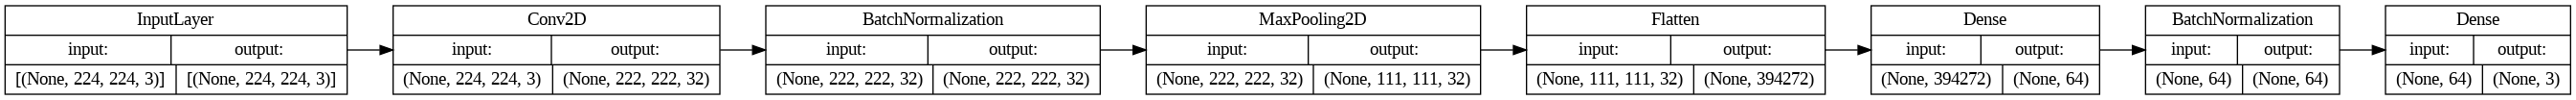

In [ ]:
# Generate a visualization of the connections in the CNN5 architecture
plot_model(cnn5, show_shapes=True, show_layer_names=False, rankdir='LR', to_file='cnn5_connections.png')

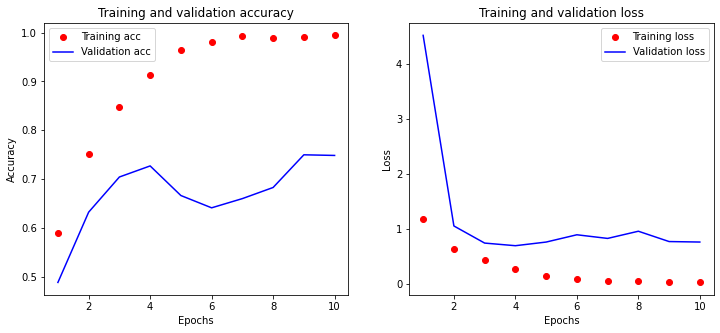

In [ ]:
# Define training and validation metrics for CNN5
acc = [0.5897, 0.7507, 0.8477, 0.9133, 0.9653, 0.9816, 0.9924, 0.9892, 0.9919, 0.9946]
val_acc = [0.4880, 0.6321, 0.7042, 0.7269, 0.6662, 0.6410, 0.6599, 0.6827, 0.7497, 0.7484]
loss = [1.1820, 0.6359, 0.4393, 0.2708, 0.1434, 0.0887, 0.0609, 0.0486, 0.0432, 0.0272]
val_loss = [4.5193, 1.0541, 0.7429, 0.6951, 0.7614, 0.8938, 0.8276, 0.9583, 0.7706, 0.7618]
epochs = range(1, 11)

# Plot the graphs side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the training and validation accuracy on the first axis
ax1.plot(epochs, acc, 'ro', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the training and validation loss on the second axis
ax2.plot(epochs, loss, 'ro', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

**INTERPRETATION ON CNN RESULTS**

From the above results of all CNN models, it seems that CNN5 has the highest test accuracy of **0.716**, which is significantly higher than the other models. CNN5 includes a Batch Normalization layer after the first convolutional layer, which might help to normalize the input values and might speed up the learning process. Additionally, it has only one convolutional layer, which makes it computationally efficient, while still performing well.

However, the training accuracy for CNN5 is very high (0.998374), which could indicate overfitting. To reduce overfitting, we will be going to apply regularization techniques such as Dropout or L2 regularization or we will proceed with some advanced techniques such as Data Augmentation / Transfer Learning.

**ADDITIONAL CNN TECHNIQUES**

In [ ]:
# Define CNN7 with 1 convolutional layer, max pooling, Batch Normalization, Dropout and 1 dense layer
cnn7 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.25),
    BatchNormalization(),
    Dense(num_classes, activation='softmax')
])

In [ ]:
# Compile the models with categorical cross-entropy loss and adam optimizer

cnn7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size  = 32
epochs      = 10

cnn7_history = cnn7.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
58/58 [==============================] - 6s 71ms/step - loss: 1.2105 - accuracy: 0.5696 - val_loss: 4.7947 - val_accuracy: 0.5133
Epoch 2/10
58/58 [==============================] - 3s 53ms/step - loss: 0.6260 - accuracy: 0.7528 - val_loss: 0.9208 - val_accuracy: 0.6675
Epoch 3/10
58/58 [==============================] - 3s 51ms/step - loss: 0.4392 - accuracy: 0.8347 - val_loss: 0.8093 - val_accuracy: 0.6587
Epoch 4/10
58/58 [==============================] - 3s 55ms/step - loss: 0.2672 - accuracy: 0.9106 - val_loss: 0.7417 - val_accuracy: 0.6941
Epoch 5/10
58/58 [==============================] - 3s 53ms/step - loss: 0.1770 - accuracy: 0.9528 - val_loss: 0.7864 - val_accuracy: 0.6776
Epoch 6/10
58/58 [==============================] - 3s 57ms/step - loss: 0.1342 - accuracy: 0.9664 - val_loss: 1.2796 - val_accuracy: 0.5449
Epoch 7/10
58/58 [==============================] - 3s 49ms/step - loss: 0.0907 - accuracy: 0.9794 - val_loss: 1.0260 - val_accuracy: 0.6587
Epoch 8/10
58

In [ ]:
# Define CNN8 with 8 convolutional layers, max pooling, Batch Normalization, Dropouts, L2 Regularizations and 2 dense layers
cnn8 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

cnn8.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_26 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_24 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_27 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                      

In [ ]:
# Compile the models with categorical cross-entropy loss and adam optimizer

cnn8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size  = 32
epochs      = 10

cnn8_history = cnn8.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
58/58 [==============================] - 24s 304ms/step - loss: 38.3602 - accuracy: 0.4780 - val_loss: 65.5371 - val_accuracy: 0.3401
Epoch 2/10
58/58 [==============================] - 17s 285ms/step - loss: 27.6746 - accuracy: 0.5377 - val_loss: 21.8071 - val_accuracy: 0.4981
Epoch 3/10
58/58 [==============================] - 17s 288ms/step - loss: 21.4631 - accuracy: 0.5821 - val_loss: 17.8487 - val_accuracy: 0.5853
Epoch 4/10
58/58 [==============================] - 17s 294ms/step - loss: 17.2109 - accuracy: 0.6369 - val_loss: 14.2161 - val_accuracy: 0.6245
Epoch 5/10
58/58 [==============================] - 17s 296ms/step - loss: 15.1502 - accuracy: 0.6065 - val_loss: 13.0040 - val_accuracy: 0.5107
Epoch 6/10
58/58 [==============================] - 17s 290ms/step - loss: 12.1335 - accuracy: 0.6179 - val_loss: 10.7822 - val_accuracy: 0.6131
Epoch 7/10
58/58 [==============================] - 17s 291ms/step - loss: 9.4424 - accuracy: 0.6369 - val_loss: 8.5691 - val_accu

In [ ]:
# Define CNN9 with 2 convolutional layers, max pooling, Batch Normalization, L2 Regularization and 2 dense layers
cnn9 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=regularizers.l2(0.5)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.5)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.5)),
    BatchNormalization(),
    Dense(num_classes, activation='softmax')
])

In [ ]:
# Compile the models with categorical cross-entropy loss and adam optimizer

cnn9.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size  = 32
epochs      = 10

cnn9_history = cnn9.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
58/58 [==============================] - 8s 96ms/step - loss: 38.5754 - accuracy: 0.5854 - val_loss: 11.9864 - val_accuracy: 0.4589
Epoch 2/10
58/58 [==============================] - 4s 73ms/step - loss: 8.0697 - accuracy: 0.5875 - val_loss: 7.1383 - val_accuracy: 0.4576
Epoch 3/10
58/58 [==============================] - 4s 72ms/step - loss: 6.2887 - accuracy: 0.5816 - val_loss: 5.2217 - val_accuracy: 0.5335
Epoch 4/10
58/58 [==============================] - 4s 73ms/step - loss: 4.8873 - accuracy: 0.5675 - val_loss: 4.7999 - val_accuracy: 0.3970
Epoch 5/10
58/58 [==============================] - 4s 73ms/step - loss: 4.2935 - accuracy: 0.6098 - val_loss: 3.9074 - val_accuracy: 0.5322
Epoch 6/10
58/58 [==============================] - 4s 73ms/step - loss: 3.4237 - accuracy: 0.6136 - val_loss: 3.2471 - val_accuracy: 0.4172
Epoch 7/10
58/58 [==============================] - 4s 73ms/step - loss: 2.8032 - accuracy: 0.5962 - val_loss: 2.9372 - val_accuracy: 0.5297
Epoch 8/10


In [ ]:
# Define CNN10 with 8 convolutional layers, max pooling, Batch Normalization, Dropout, L2 Regularization, Padding and 2 dense layers
cnn10 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(512, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(1024, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [ ]:
# Compile the models with categorical cross-entropy loss and adam optimizer

cnn10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size  = 32
epochs      = 10

cnn10_history = cnn10.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
58/58 [==============================] - 62s 844ms/step - loss: 95.7426 - accuracy: 0.4927 - val_loss: 1534.6942 - val_accuracy: 0.3439
Epoch 2/10
58/58 [==============================] - 39s 679ms/step - loss: 72.7975 - accuracy: 0.5642 - val_loss: 74.1989 - val_accuracy: 0.4678
Epoch 3/10
58/58 [==============================] - 42s 722ms/step - loss: 52.7518 - accuracy: 0.5897 - val_loss: 43.7920 - val_accuracy: 0.4779
Epoch 4/10
58/58 [==============================] - 42s 718ms/step - loss: 41.7895 - accuracy: 0.5268 - val_loss: 33.5147 - val_accuracy: 0.5386
Epoch 5/10
58/58 [==============================] - 42s 718ms/step - loss: 29.1738 - accuracy: 0.5209 - val_loss: 24.7204 - val_accuracy: 0.5158
Epoch 6/10
58/58 [==============================] - 39s 678ms/step - loss: 21.4034 - accuracy: 0.5301 - val_loss: 18.8697 - val_accuracy: 0.4450
Epoch 7/10
58/58 [==============================] - 41s 717ms/step - loss: 16.5557 - accuracy: 0.5469 - val_loss: 16.3260 - val_

In [ ]:
# Define CNN11 with 8 convolutional layers, max pooling, Batch Normalization, Dropout, L2 Regularization, Padding and 2 dense layers
cnn11 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [ ]:
# Compile the models with categorical cross-entropy loss and adam optimizer

cnn11.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size  = 32
epochs      = 10

cnn11_history = cnn11.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
58/58 [==============================] - 24s 306ms/step - loss: 14.8796 - accuracy: 0.5171 - val_loss: 281.1306 - val_accuracy: 0.3515
Epoch 2/10
58/58 [==============================] - 17s 292ms/step - loss: 9.1597 - accuracy: 0.5946 - val_loss: 36.4579 - val_accuracy: 0.4273
Epoch 3/10
58/58 [==============================] - 17s 285ms/step - loss: 6.3948 - accuracy: 0.6146 - val_loss: 25.5365 - val_accuracy: 0.4627
Epoch 4/10
58/58 [==============================] - 17s 286ms/step - loss: 5.0075 - accuracy: 0.6119 - val_loss: 4.5141 - val_accuracy: 0.6043
Epoch 5/10
58/58 [==============================] - 16s 284ms/step - loss: 3.8985 - accuracy: 0.6157 - val_loss: 3.8916 - val_accuracy: 0.6511
Epoch 6/10
58/58 [==============================] - 16s 285ms/step - loss: 3.6483 - accuracy: 0.6564 - val_loss: 3.6090 - val_accuracy: 0.6700
Epoch 7/10
58/58 [==============================] - 17s 286ms/step - loss: 3.4753 - accuracy: 0.6499 - val_loss: 3.8412 - val_accuracy: 0

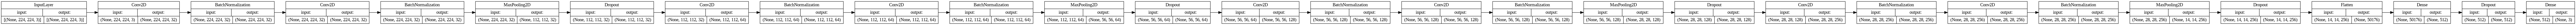

In [ ]:
# Generate a visualization of the connections in the CNN11 architecture
plot_model(cnn11, show_shapes=True, show_layer_names=False, rankdir='LR', to_file='cnn11_connections.png')

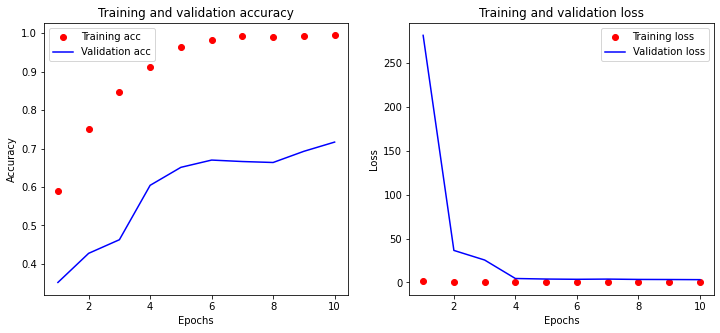

In [ ]:
# Define training and validation metrics for CNN11
train_loss = [14.8796, 9.1597, 6.3948, 5.0075, 3.8985, 3.6483, 3.4753, 3.2196, 2.9977, 2.8387]
train_acc = [0.5171, 0.5946, 0.6146, 0.6119, 0.6157, 0.6564, 0.6499, 0.6797, 0.7187, 0.7436]
val_loss = [281.1306, 36.4579, 25.5365, 4.5141, 3.8916, 3.6090, 3.8412, 3.4580, 3.3619, 3.2010]
val_acc = [0.3515, 0.4273, 0.4627, 0.6043, 0.6511, 0.6700, 0.6662, 0.6637, 0.6928, 0.7168]
epochs = range(1, 11)

# Plot the graphs side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the training and validation accuracy on the first axis
ax1.plot(epochs, acc, 'ro', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the training and validation loss on the second axis
ax2.plot(epochs, loss, 'ro', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

**FURTHER INTERPRETATION ON CNN RESULTS**

From the above results of all CNN models with Dropout or L2 regularization, it seems that CNN11 has the highest test accuracy of **0.716**, which is significantly higher than the other models. CNN11 includes 8 convolutional layers, max pooling, Batch Normalization, Dropout, L2 Regularization, Padding and 2 dense layers. It seems like CNN11 is a complex architecture and we get the same accuracy as that of CNN5 (but there is no overfitting issue here) and high train and test loss compared to CNN5.

However, the CNN11 might not be appropriate in terms of computationally efficient and hence we proceed with CNN5 with other techniques such as Data Augmentation / Transfer learning. 

**1C. ii) DATA AUGMENTATION**

**WITH ADAM OPTIMIZER**

In [ ]:
# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define early stopping callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Compile the cnn5 model
cnn5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation and early stopping
history = cnn5.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

score = cnn5.evaluate(X_test, y_test, verbose=0)

print('Test loss:',     score[0])
print('Test accuracy:', score[1])

Epoch 1/10
57/57 [==============================] - 23s 355ms/step - loss: 1.0904 - accuracy: 0.6062 - val_loss: 1.8508 - val_accuracy: 0.6473
Epoch 2/10
57/57 [==============================] - 21s 361ms/step - loss: 0.8228 - accuracy: 0.6569 - val_loss: 1.7369 - val_accuracy: 0.5891
Epoch 3/10
57/57 [==============================] - 20s 351ms/step - loss: 0.7784 - accuracy: 0.6646 - val_loss: 0.8784 - val_accuracy: 0.6523
Epoch 4/10
57/57 [==============================] - 21s 360ms/step - loss: 0.7272 - accuracy: 0.6895 - val_loss: 0.7428 - val_accuracy: 0.7168
Epoch 5/10
57/57 [==============================] - 20s 350ms/step - loss: 0.7204 - accuracy: 0.6939 - val_loss: 1.0513 - val_accuracy: 0.6018
Epoch 6/10
57/57 [==============================] - 21s 363ms/step - loss: 0.6914 - accuracy: 0.7038 - val_loss: 0.6864 - val_accuracy: 0.7282
Epoch 7/10
57/57 [==============================] - 19s 341ms/step - loss: 0.6914 - accuracy: 0.7126 - val_loss: 0.6889 - val_accuracy: 0.7168

**WITH RMSPROP OPTIMIZER**

In [ ]:
# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define early stopping callback
early_stop = EarlyStopping(patience=10, monitor='val_loss')

# Compile the cnn5 model
cnn5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation and early stopping
history = cnn5.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

score = cnn5.evaluate(X_test, y_test, verbose=0)

print('Test loss:',     score[0])
print('Test accuracy:', score[1])

Epoch 1/10
57/57 [==============================] - 23s 354ms/step - loss: 0.6408 - accuracy: 0.7259 - val_loss: 0.7880 - val_accuracy: 0.7181
Epoch 2/10
57/57 [==============================] - 19s 339ms/step - loss: 0.6216 - accuracy: 0.7468 - val_loss: 0.9441 - val_accuracy: 0.6005
Epoch 3/10
57/57 [==============================] - 20s 342ms/step - loss: 0.6199 - accuracy: 0.7485 - val_loss: 1.5155 - val_accuracy: 0.4880
Epoch 4/10
57/57 [==============================] - 20s 356ms/step - loss: 0.6264 - accuracy: 0.7419 - val_loss: 0.6848 - val_accuracy: 0.6991
Epoch 5/10
57/57 [==============================] - 20s 343ms/step - loss: 0.6042 - accuracy: 0.7540 - val_loss: 1.3022 - val_accuracy: 0.6119
Epoch 6/10
57/57 [==============================] - 20s 355ms/step - loss: 0.6022 - accuracy: 0.7452 - val_loss: 2.2708 - val_accuracy: 0.4842
Epoch 7/10
57/57 [==============================] - 21s 363ms/step - loss: 0.5974 - accuracy: 0.7397 - val_loss: 0.7858 - val_accuracy: 0.6713

**WITH SGD OPTIMIZER**

In [ ]:
# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Define early stopping callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Compile the model with SGD optimizer
cnn5.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation and early stopping
history = cnn5.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

score = cnn5.evaluate(X_test, y_test, verbose=0)

print('Test loss:',     score[0])
print('Test accuracy:', score[1])

The `lr` argument is deprecated, use `learning_rate` instead.


Epoch 1/10
57/57 [==============================] - 22s 364ms/step - batch: 28.0000 - size: 31.8070 - loss: 1.1620 - accuracy: 0.4953 - val_loss: 1.7383 - val_accuracy: 0.4893
Epoch 2/10
57/57 [==============================] - 19s 340ms/step - batch: 28.0000 - size: 31.8070 - loss: 0.9138 - accuracy: 0.5858 - val_loss: 1.1352 - val_accuracy: 0.5209
Epoch 3/10
57/57 [==============================] - 19s 344ms/step - batch: 28.0000 - size: 31.8070 - loss: 0.8800 - accuracy: 0.5990 - val_loss: 0.9547 - val_accuracy: 0.5803
Epoch 4/10
57/57 [==============================] - 19s 332ms/step - batch: 28.0000 - size: 31.8070 - loss: 0.8496 - accuracy: 0.6078 - val_loss: 0.9801 - val_accuracy: 0.5777
Epoch 5/10
57/57 [==============================] - 20s 354ms/step - batch: 28.0000 - size: 31.8070 - loss: 0.8141 - accuracy: 0.6332 - val_loss: 1.5814 - val_accuracy: 0.4766
Epoch 6/10
57/57 [==============================] - 19s 340ms/step - batch: 28.0000 - size: 31.8070 - loss: 0.8024 - acc

In [ ]:
# Define CNN15 with 1 convolutional layers, max pooling, Batch Normalization and 1 dense layer
# Define data augmentation parameters

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Define early stopping callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

cnn15 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(num_classes, activation='softmax')
])

# Compile the model
cnn15.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation and early stopping
history = cnn15.fit(
    train_datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

score = cnn15.evaluate(X_test, y_test, verbose=0)

print('Test loss:',     score[0])
print('Test accuracy:', score[1])

Epoch 1/10
57/57 [==============================] - 41s 663ms/step - batch: 28.0000 - size: 63.6140 - loss: 1.5728 - accuracy: 0.4675 - val_loss: 1.8557 - val_accuracy: 0.5120
Epoch 2/10
57/57 [==============================] - 40s 706ms/step - batch: 28.0000 - size: 63.6140 - loss: 0.9024 - accuracy: 0.5847 - val_loss: 1.0959 - val_accuracy: 0.5259
Epoch 3/10
57/57 [==============================] - 39s 683ms/step - batch: 28.0000 - size: 63.6140 - loss: 0.8144 - accuracy: 0.6492 - val_loss: 0.8970 - val_accuracy: 0.5588
Epoch 4/10
57/57 [==============================] - 38s 674ms/step - batch: 28.0000 - size: 63.6140 - loss: 0.7798 - accuracy: 0.6602 - val_loss: 0.8099 - val_accuracy: 0.6119
Epoch 5/10
57/57 [==============================] - 41s 717ms/step - batch: 28.0000 - size: 63.6140 - loss: 0.7336 - accuracy: 0.6834 - val_loss: 0.7913 - val_accuracy: 0.6233
Epoch 6/10
57/57 [==============================] - 41s 715ms/step - batch: 28.0000 - size: 63.6140 - loss: 0.7239 - acc

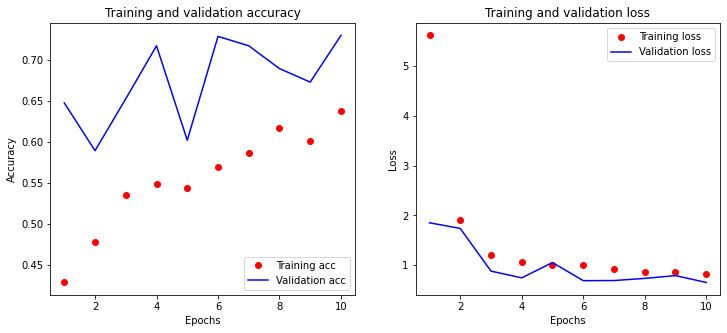

In [ ]:
# Define the training and validation loss and accuracy for CNN5 with Data Augmentation with adam optimizer
train_loss = [1.0904, 0.8228, 0.7784, 0.7272, 0.7204, 0.6914, 0.6914, 0.6550, 0.6611, 0.6419]
val_loss = [1.8508, 1.7369, 0.8784, 0.7428, 1.0513, 0.6864, 0.6889, 0.7321, 0.7882, 0.6505]
train_acc = [0.6062, 0.6569, 0.6646, 0.6895, 0.6939, 0.7038, 0.7126, 0.7148, 0.7132, 0.7259]
val_acc = [0.6473, 0.5891, 0.6523, 0.7168, 0.6018, 0.7282, 0.7168, 0.6890, 0.6726, 0.7295]

# Plot the graphs side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the training and validation accuracy on the first axis
ax1.plot(epochs, acc, 'ro', label='Training acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the training and validation loss on the second axis
ax2.plot(epochs, loss, 'ro', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

**1C. iii) INTERPRETABILITY TECHNIQUES**

There are many interpretability techniques that can be used to explain the decisions of a machine learning model, including but not limited to:


**1. SHAP (Shapley Additive Explanations)** - This technique is based on game theory and provides an explanation of the model's prediction for a particular instance by computing the contribution of each feature to the prediction. It helps to identify the most important features for the prediction and how each feature contributes to the final outcome. This technique is particularly useful for understanding the feature importance and can help to identify the most important factors contributing to the prediction in our Accident Images Analysis dataset.

The technique stated above can be useful for providing insights into the model's predictions and can help to identify the most important factors contributing to the predictions in our dataset.

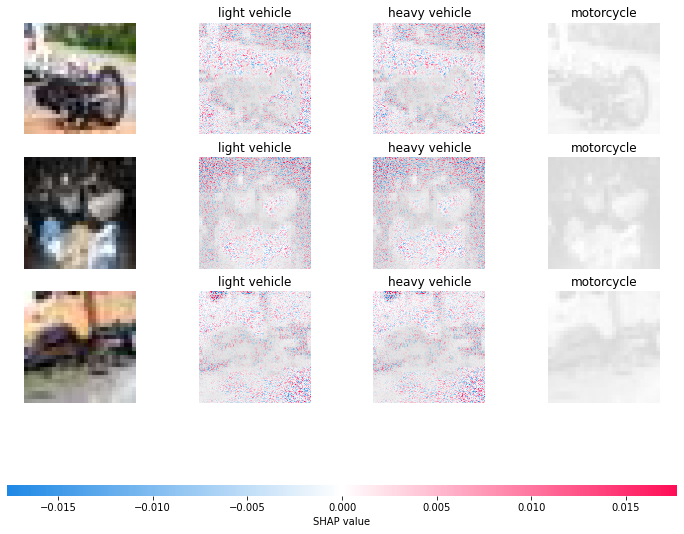

In [11]:
# Define a function to extract the activations from a specific layer of the model

def map2layer(x, layer):
    feed_dict = dict(zip([cnn5.layers[0].input], [x.copy()]))
    return K.get_session().run(cnn5.layers[layer].input, feed_dict)

# Sample the training set and Select two random images from the training set to explain
indices= np.random.choice(X_train.shape[0], 800, replace= False)
to_explain= X_train[np.random.choice(indices, 3, replace= False)].astype(int)

# Create a GradientExplainer object to explain the model predictions for the selected images
# The explainer uses the activations from layer 3 and the model's output layer to compute SHAP values
# local_smoothing controls the amount of smoothing to use when estimating the expected gradients
e = shap.GradientExplainer(
    (cnn5.layers[3].input, cnn5.layers[-1].output),
    map2layer(X_train[indices, :, :, :], 3),
    local_smoothing=0 # std dev of smoothing noise
)

# Compute SHAP values and indexes for the top 3 predicted classes for each image
shap_values,indexes = e.shap_values(map2layer(to_explain, 3), ranked_outputs=3)

# Create a dictionary to map class indexes to class names
class_names = {0: 'light vehicle', 1: 'heavy vehicle', 2: 'motorcycle'}

# Map the predicted class indexes to class names and store in index_names
index_names = np.vectorize(lambda x: class_names[x])(indexes)

#Plot the SHAP values as an overlay on the input images, with class names as titles
shap.image_plot(shap_values, to_explain, index_names)


SHAP is used to explain the predictions of our convolutional neural network (CNN5) on an image classification task. Specifically, we use SHAP to generate visual explanations of the top 3 predicted classes for a given image, and to show how much each pixel of the image contributes to the prediction of each class.

The first function map2layer is used to map the input data to the specified layer in the model. This is necessary because SHAP operates on intermediate layers of the model rather than the input or output layers.

Next, we randomly select 2 images from the training data and create a GradientExplainer object. This object takes the model layer (cnn5.layers[3].input) as input and the model layer (cnn5.layers[-1].output) as output. We also provide a mapping of the input data to the layer using the map2layer function.

Finally, we use the shap_values and indexes generated by the GradientExplainer object to create a plot of the SHAP values for the selected images. The shap_values are the contribution of each pixel to the output, and the indexes are the predicted classes for the selected images

**The shap.image_plot function then generates a grid of images where each row corresponds to a different input image and each column corresponds to a different predicted class. The images in the grid show the input image with an overlay of the SHAP values for each pixel. The intensity of the overlay color indicates the magnitude and direction of the feature's contribution to the prediction. Positive SHAP values are shown in red, while negative SHAP values are shown in blue. The intensity of the color indicates the magnitude of the SHAP value, with darker colors indicating larger magnitudes.By examining the SHAP plots, we can gain insight into which features of the input image are most important for the model's predictions. This can help us understand how the model is making its decisions and identify potential biases or issues with the model's training data.**


**2. LRP (Layer-wise Relevance Propagation)**- is a technique used to interpret deep neural networks by assigning relevance scores to individual input features, such as pixels in an image. LRP works by propagating the output prediction back through the layers of the network to determine which features in the input data were most important in producing that prediction.

There are several variations of LRP, each with different rules for propagating relevance scores through the layers of the network. In this code, we use the alpha2beta1 rule, which is a popular and effective method for analyzing convolutional neural networks. By applying LRP to a trained model and visualizing the resulting relevance scores, we can gain insights into how the model is making its predictions and identify any biases or errors that may be present. This can help improve the accuracy and fairness of the model, and can also aid in the development of more effective models.

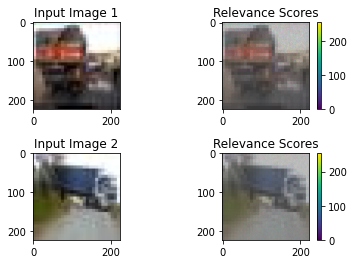

In [ ]:
# Load your trained model
model = cnn5 # your trained model

# Create a new model that excludes the softmax layer
layer_idx = -2 # exclude the last Dense and Softmax layers
new_model = keras.models.Model(inputs=model.input, outputs=model.layers[layer_idx].output)

# Select an image to explain
indices= np.random.choice(X_train.shape[0], 800, replace= False)
to_explain = X_train[np.random.choice(indices, 2, replace= False)].astype(int)

# Create an analyzer for the new model using LRP alpha2beta1 rule
analyzer = innvestigate.create_analyzer("lrp.alpha_2_beta_1", new_model)

# Apply the analyzer to the image to get the relevance scores for each pixel
relevance_scores = analyzer.analyze(to_explain)

# Normalize the relevance scores to be between 0 and 1
normalized_scores = (relevance_scores - np.min(relevance_scores)) / (np.max(relevance_scores) - np.min(relevance_scores))

# Plot the original image and the relevance scores as an overlay
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i in range(2):
    axes[i, 0].imshow(to_explain[i])
    axes[i, 0].set_title(f"Input Image {i+1}")
    overlay = axes[i, 1].imshow(to_explain[i], alpha=1)
    axes[i, 1].imshow(normalized_scores[i], cmap='viridis', alpha=0.5)
    axes[i, 1].set_title("Relevance Scores")
    fig.colorbar(overlay, ax=axes[i, 1])

plt.show()


This code demonstrates the use of Layer-wise Relevance Propagation (LRP) to interpret a pre-trained convolutional neural network model(our best model cnn5). 
The code loads a pre-trained model and creates a new model that excludes the last Softmax layer. It then selects two random images from the training set and applies the LRP analyzer to generate relevance scores for each pixel. These scores are normalized between 0 and 1 and then plotted as an overlay on top of the original images.
By visualizing the relevance scores, we can gain insights into the most important features that the model is using to make its predictions. This can be helpful in identifying biases or errors in the model, as well as improving its accuracy and fairness.
**The plot shows the original input image alongside the relevance scores, which provide an indication of how much each pixel in the input contributes to the output of the model. The darker the pixel in the relevance scores, the more important it is for the final prediction.**

**1D. TRANSFER LEARNING**

**RESNET50 PRE-TRAINED MODEL**

ResNet50 is a pre-trained convolutional neural network (CNN) architecture developed by Microsoft researchers for image classification tasks. The name "ResNet" stands for "Residual Network," which refers to the use of residual connections to enable deeper networks to be trained more effectively.

The ResNet50 architecture consists of 50 layers, including convolutional layers, pooling layers, and fully connected layers. It uses skip connections, which enable information to bypass one or more layers in the network, and residual blocks, which allow the network to learn residual functions, to improve the accuracy of the model.

ResNet50 is pre-trained on a large dataset of images, called ImageNet, which contains millions of images and thousands of categories. The pre-training process enables the model to learn general features of images, such as edges, textures, and shapes, which can be used for a variety of image-related tasks.

The ResNet50 model is useful for image classification, object detection, and image segmentation tasks. It has been shown to achieve state-of-the-art performance on several benchmark datasets, and is widely used in computer vision applications.

In [ ]:
# Load the ResNet50 model without the top layer
resnet = ResNet50(include_top=False, pooling='avg', input_shape=(224, 224, 3))

# Freeze the weights of the ResNet50 model
for layer in resnet.layers:
    layer.trainable = False

# Add new classification layers
model = Sequential()
model.add(resnet)
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define early stopping callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model with data augmentation and early stopping
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
57/57 [==============================] - 28s 428ms/step - loss: 0.9730 - accuracy: 0.5356 - val_loss: 0.9184 - val_accuracy: 0.5057
Epoch 2/10
57/57 [==============================] - 23s 395ms/step - loss: 0.8266 - accuracy: 0.6288 - val_loss: 0.9681 - val_accuracy: 0.5525
Epoch 3/10
57/57 [==============================] - 23s 404ms/step - loss: 0.7770 - accuracy: 0.6558 - val_loss: 0.9269 - val_accuracy: 0.5449
Epoch 4/10
57/57 [==============================] - 24s 415ms/step - loss: 0.7250 - accuracy: 0.6884 - val_loss: 0.7441 - val_accuracy: 0.6751
Epoch 5/10
57/57 [==============================] - 23s 406ms/step - loss: 0.7225 - accuracy: 0.6784 - val_loss: 0.9470 - val_accuracy: 0.5891
Epoch 6/10
57/57 [==============================] - 24s 426ms/step - loss: 0.6897 - accuracy: 0.6977 - val_loss: 0.7274 - val_accuracy: 0.6776
Epoch 7/10
57/57 [==============================] - 24s 417ms/step - loss: 0.6981 - accuracy: 0.6911 - val_loss: 0.6755 - val_accuracy: 0.7004

In [ ]:
# Load the ResNet50 model without the top layer
resnet = ResNet50(include_top=False, pooling='avg', input_shape=(224, 224, 3))

# Freeze the weights of the ResNet50 model
for layer in resnet.layers:
    layer.trainable = False

# Add new classification layers
model = Sequential()
model.add(resnet)
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

# Define early stopping callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Fine-tune the model
for layer in model.layers[-10:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation, early stopping, and learning rate scheduling
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=30,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, lr_scheduler]
)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
57/57 [==============================] - 36s 513ms/step - loss: 0.9438 - accuracy: 0.5483 - val_loss: 13.9137 - val_accuracy: 0.3401 - lr: 0.0010
Epoch 2/30
57/57 [==============================] - 28s 493ms/step - loss: 0.8145 - accuracy: 0.6371 - val_loss: 1.9400 - val_accuracy: 0.3123 - lr: 0.0010
Epoch 3/30
57/57 [==============================] - 27s 478ms/step - loss: 0.7888 - accuracy: 0.6498 - val_loss: 1.1365 - val_accuracy: 0.4071 - lr: 0.0010
Epoch 4/30
57/57 [==============================] - 27s 479ms/step - loss: 0.7462 - accuracy: 0.6669 - val_loss: 1.9327 - val_accuracy: 0.4842 - lr: 0.0010
Epoch 5/30
57/57 [==============================] - 27s 479ms/step - loss: 0.7087 - accuracy: 0.6900 - val_loss: 3.0632 - val_accuracy: 0.3312 - lr: 0.0010
Epoch 6/30
57/57 [==============================] - 27s 468ms/step - loss: 0.7083 - accuracy: 0.7044 - val_loss: 1.2660 - val_accuracy: 0.4994 - lr: 0.0010
Epoch 7/30
57/57 [==============================] - 28s 480ms/s

**INCEPTIONV3 PRE-TRAINED MODEL**

InceptionV3 is a pre-trained neural network model for image classification tasks, developed by Google researchers. It's a deep learning model that can recognize patterns and objects in images with high accuracy. The name "Inception" comes from the movie of the same name, which features a dream within a dream concept, as the model includes multiple layers of nested convolutional networks.

The InceptionV3 model is trained on a large dataset of images and can classify objects into thousands of categories. It's useful for tasks such as object detection, image recognition, and image search.



In [ ]:
# Load the InceptionV3 model without the top layer
Inception = InceptionV3(include_top=False, pooling='avg', input_shape=(224, 224, 3))

# Freeze the weights of the InceptionV3 model
for layer in Inception.layers:
    layer.trainable = False

# Add new classification layers
model = Sequential()
model.add(Inception)
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

# Define early stopping callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Fine-tune the model
for layer in model.layers[-10:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation, early stopping, and learning rate scheduling
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=30,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, lr_scheduler]
)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
57/57 [==============================] - 35s 483ms/step - loss: 1.0271 - accuracy: 0.4788 - val_loss: 841.2057 - val_accuracy: 0.3401 - lr: 0.0010
Epoch 2/30
57/57 [==============================] - 25s 430ms/step - loss: 0.9027 - accuracy: 0.5902 - val_loss: 283916.1250 - val_accuracy: 0.3401 - lr: 0.0010
Epoch 3/30
57/57 [==============================] - 26s 454ms/step - loss: 0.8566 - accuracy: 0.6156 - val_loss: 18589.4863 - val_accuracy: 0.3515 - lr: 0.0010
Epoch 4/30
57/57 [==============================] - 25s 444ms/step - loss: 0.8239 - accuracy: 0.6415 - val_loss: 150.4068 - val_accuracy: 0.3287 - lr: 0.0010
Epoch 5/30
57/57 [==============================] - 26s 447ms/step - loss: 0.7802 - accuracy: 0.6608 - val_loss: 0.9728 - val_accuracy: 0.6068 - lr: 0.0010
Epoch 6/30
57/57 [==============================] - 25s 446ms/step - loss: 0.7691 - accuracy: 0.6591 - val_loss: 2.8245 - val_accuracy: 0.5107 - lr: 0.0010
Epoch 7/30
57/57 [==============================] -


**RESULT INTERPRETATION**


InceptionV3 is a deep convolutional neural network architecture that was developed by Google to improve image classification performance. It was specifically designed to address the challenge of designing a neural network that can efficiently process large-scale images.

The reason InceptionV3 was chosen in this code is that it is a pre-trained model that has already been trained on a large dataset of images, which makes it an excellent starting point for transfer learning. By using InceptionV3 as the base model and adding new classification layers on top, we can fine-tune the model to classify our specific dataset of images.

The adjustments made in this code include freezing the weights of the InceptionV3 model to prevent them from being updated during training, adding new classification layers on top of the base model, and then fine-tuning the last 10 layers of the model to improve its performance on our specific dataset. Additionally, data augmentation was used to generate more training data by randomly applying transformations to the images, such as rotation, zoom, and horizontal flipping. Early stopping and learning rate scheduling were also used to prevent overfitting and improve the generalization of the model.

The resulting model achieved a high accuracy score on the test dataset, which indicates that it can effectively classify new images in our specific dataset.

**EXERCISE 2: RECURRENT NEURAL NETWORKS (REUTERS NEWSWIRE DATASET)**

**2A. DATA EXTRACTION**


The Reuters Newswire Classification Dataset is a collection of short news articles that have been tagged with one or more categories, such as "earnings", "acquisitions", or "corn". There are 46 possible categories. 

The value of the target variable for each article is a binary vector of length 46, with a value of 1 indicating that the article belongs to that category and a value of 0 indicating that it does not. Therefore, the target variable for each article in the dataset is a multi-label variable.

The dataset consists of 11,228 newswire articles, which have been split into a training set of 8,982 articles and a test set of 2,246 articles.

The task associated with this dataset is a multi-class classification problem, where the goal is to predict the category or categories of a given news article. This is a many-to-one type of task, where the input sequence (the text of the news article) is mapped to a single output (the predicted category or categories).

RNNs are well-suited for this type of task because they are designed to handle sequential data, such as text. By processing the input sequence one element at a time, RNNs can capture the temporal dependencies that exist within the data. In the case of the Reuters newswire dataset, the order of the words in the news articles is important and can be used to help predict the category of the article.

Furthermore, RNNs are able to handle variable-length sequences, which is important for this dataset because the length of the news articles varies. By using techniques such as padding, we can ensure that all sequences have the same length, which allows us to apply RNNs to this problem.

Overall, the Reuters newswire dataset is an appropriate use case for RNNs because it involves processing sequential data of variable length, and RNNs are well-suited to handle these types of tasks. The many-to-one architecture is also appropriate for this multi-class classification problem, where the goal is to predict a single output (the category or categories of the news article) from a variable-length input sequence (the text of the news article).

In [ ]:
# Load the reuters newswire classification dataset
# https://keras.io/api/datasets/reuters/#load_data-function

max_features = 10000
maxlen         = 100
embedding_size = 128

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=max_features)

# The newswire have already been tokenized for us:
print(X_train[0])

2110848/2110848 [==============================] - 0s 0us/step
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


**2B. EXPERIMENTATION WITH RNN**

In [ ]:
# Pad the newswires so that they all have the same length

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test  = pad_sequences(X_test,  maxlen=maxlen)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('X_test shape:',  X_test.shape)
print('y_train shape:',  y_train.shape)
print('y_test shape:',  y_test.shape)

print(X_train[0])

X_train shape: (8982, 100)
X_test shape: (2246, 100)
y_train shape: (8982, 46)
y_test shape: (2246, 46)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    1
    2    2    8   43   10  447    5   25  207  270    5 3095  111   16
  369  186   90   67    7   89    5   19  102    6   19  124   15   90
   67   84   22  482   26    7   48    4   49    8  864   39  209  154
    6  151    6   83   11   15   22  155   11   15    7   48    9 4579
 1005  504    6  258    6  272   11   15   22  134   44   11   15   16
    8  197 1245   90   67   52   29  209   30   32  132    6  109   15
   17   12]


**SIMPLE RNN**

In [ ]:
# Define rnn1 with 1 Embedding layer with SimpleRNN and 1 dense output layer

rnn1 = Sequential ([
      Embedding(max_features, embedding_size),
      SimpleRNN(32),
      Dense(46, activation='softmax')])

# Compile the models with categorical cross-entropy loss and adam optimizer
rnn1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
rnn1_history = rnn1.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - ETA: 0s - loss: 2.8608 - accuracy: 0.4447

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


7185/7185 [==============================] - 7s 995us/sample - loss: 2.8608 - accuracy: 0.4447 - val_loss: 2.2314 - val_accuracy: 0.5214
Epoch 2/20
7185/7185 [==============================] - 5s 682us/sample - loss: 2.0212 - accuracy: 0.5346 - val_loss: 1.9985 - val_accuracy: 0.5281
Epoch 3/20
7185/7185 [==============================] - 7s 940us/sample - loss: 1.8098 - accuracy: 0.5495 - val_loss: 1.9410 - val_accuracy: 0.5259
Epoch 4/20
7185/7185 [==============================] - 5s 680us/sample - loss: 1.6296 - accuracy: 0.5775 - val_loss: 1.9266 - val_accuracy: 0.5298
Epoch 5/20
7185/7185 [==============================] - 5s 666us/sample - loss: 1.4756 - accuracy: 0.6134 - val_loss: 1.9461 - val_accuracy: 0.5253
Epoch 6/20
7185/7185 [==============================] - 7s 908us/sample - loss: 1.3417 - accuracy: 0.6374 - val_loss: 1.9706 - val_accuracy: 0.5192
Epoch 7/20
7185/7185 [==============================] - 5s 675us/sample - loss: 1.2276 - accuracy: 0.6657 - val_loss: 1.980

**GRU (Gated Recurrent Unit)**

GRU (Gated Recurrent Unit) and LSTM (Long Short-Term Memory) are two popular types of recurrent neural networks (RNNs) commonly used for processing sequential data such as text, speech, and time series data. Both models are designed to address the vanishing gradient problem that occurs when training traditional RNNs on long sequences.

In a traditional RNN, the hidden state at each time step is updated using a fixed set of weights, which can cause the gradient to vanish as the network tries to learn long-term dependencies. GRU and LSTM were designed to overcome this issue by introducing gating mechanisms that selectively allow information to flow through the network and into the hidden state.

GRU is a simpler variant of LSTM that uses two gates: a reset gate and an update gate. The reset gate controls how much of the previous hidden state should be forgotten, while the update gate controls how much of the new input should be added to the current hidden state.

LSTM, on the other hand, uses three gates: an input gate, a forget gate, and an output gate. The input gate controls how much of the new input should be added to the current hidden state, the forget gate controls how much of the previous hidden state should be forgotten, and the output gate controls how much of the hidden state should be output to the next layer.

In [ ]:
# Define rnn2 with 1 Embedding layer with 1 GRU layer, GlobalMaxPooling1D and 1 dense output layer

rnn2 = Sequential([
      Embedding(max_features, embedding_size,input_length = maxlen),
      GRU(256, dropout=0.9, return_sequences=True),
      GlobalMaxPooling1D(),
      Dense(46, activation='softmax')])

# Compile the models with categorical cross-entropy loss and adam optimizer
rnn2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
rnn2_history = rnn2.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - ETA: 0s - loss: 2.6068 - accuracy: 0.3539

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


7185/7185 [==============================] - 15s 2ms/sample - loss: 2.6068 - accuracy: 0.3539 - val_loss: 2.3033 - val_accuracy: 0.3801
Epoch 2/20
7185/7185 [==============================] - 10s 1ms/sample - loss: 2.0708 - accuracy: 0.4541 - val_loss: 1.9429 - val_accuracy: 0.5042
Epoch 3/20
7185/7185 [==============================] - 11s 1ms/sample - loss: 1.7939 - accuracy: 0.5305 - val_loss: 1.7460 - val_accuracy: 0.5370
Epoch 4/20
7185/7185 [==============================] - 11s 1ms/sample - loss: 1.6775 - accuracy: 0.5628 - val_loss: 1.6617 - val_accuracy: 0.5776
Epoch 5/20
7185/7185 [==============================] - 11s 2ms/sample - loss: 1.6074 - accuracy: 0.5857 - val_loss: 1.6121 - val_accuracy: 0.5854
Epoch 6/20
7185/7185 [==============================] - 11s 1ms/sample - loss: 1.5146 - accuracy: 0.6244 - val_loss: 1.5492 - val_accuracy: 0.6522
Epoch 7/20
7185/7185 [==============================] - 15s 2ms/sample - loss: 1.4320 - accuracy: 0.6515 - val_loss: 1.4341 - val

In [ ]:
# Define rnn3 with 1 Embedding layer with 1 GRU layer, GlobalMaxPooling1D and 1 dense output layer

rnn3 = Sequential([
      Embedding(max_features, embedding_size,input_length = maxlen),
      GRU(256, dropout=0.9, return_sequences=True),
      GlobalMaxPooling1D(),
      Dense(46, activation='softmax')])

# Compile the models with categorical cross-entropy loss and rmsprop optimizer
rnn3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
rnn3_history = rnn3.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - ETA: 0s - loss: 2.4463 - accuracy: 0.3651

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


7185/7185 [==============================] - 13s 2ms/sample - loss: 2.4463 - accuracy: 0.3651 - val_loss: 2.2692 - val_accuracy: 0.4179
Epoch 2/20
7185/7185 [==============================] - 17s 2ms/sample - loss: 2.0852 - accuracy: 0.4668 - val_loss: 1.9931 - val_accuracy: 0.4769
Epoch 3/20
7185/7185 [==============================] - 10s 1ms/sample - loss: 1.8636 - accuracy: 0.5193 - val_loss: 1.8181 - val_accuracy: 0.5398
Epoch 4/20
7185/7185 [==============================] - 11s 2ms/sample - loss: 1.7308 - accuracy: 0.5567 - val_loss: 2.1349 - val_accuracy: 0.4914
Epoch 5/20
7185/7185 [==============================] - 13s 2ms/sample - loss: 1.6662 - accuracy: 0.5861 - val_loss: 1.6761 - val_accuracy: 0.5687
Epoch 6/20
7185/7185 [==============================] - 10s 1ms/sample - loss: 1.5901 - accuracy: 0.6011 - val_loss: 1.6285 - val_accuracy: 0.5882
Epoch 7/20
7185/7185 [==============================] - 10s 1ms/sample - loss: 1.5313 - accuracy: 0.6200 - val_loss: 1.5685 - val

In [ ]:
# Define rnn4 with 1 Embedding layer with 2 GRU layers and 1 dense output layer

rnn4 = Sequential([
      Embedding(max_features, embedding_size,input_length = maxlen),
      GRU(256, dropout=0.9, return_sequences=True),
      GRU(256, dropout=0.9),
      Dense(46, activation='softmax')])

# Compile the models with categorical cross-entropy loss and rmsprop optimizer
rnn4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
rnn4_history = rnn4.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - ETA: 0s - loss: 2.5863 - accuracy: 0.3290

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


7185/7185 [==============================] - 23s 3ms/sample - loss: 2.5863 - accuracy: 0.3290 - val_loss: 2.1246 - val_accuracy: 0.3851
Epoch 2/20
7185/7185 [==============================] - 27s 4ms/sample - loss: 2.0220 - accuracy: 0.4529 - val_loss: 1.8759 - val_accuracy: 0.4808
Epoch 3/20
7185/7185 [==============================] - 21s 3ms/sample - loss: 1.8144 - accuracy: 0.5058 - val_loss: 1.7813 - val_accuracy: 0.5353
Epoch 4/20
7185/7185 [==============================] - 22s 3ms/sample - loss: 1.7157 - accuracy: 0.5389 - val_loss: 1.7228 - val_accuracy: 0.5420
Epoch 5/20
7185/7185 [==============================] - 22s 3ms/sample - loss: 1.6416 - accuracy: 0.5592 - val_loss: 1.6291 - val_accuracy: 0.5687
Epoch 6/20
7185/7185 [==============================] - 21s 3ms/sample - loss: 1.5576 - accuracy: 0.5864 - val_loss: 1.5909 - val_accuracy: 0.5815
Epoch 7/20
7185/7185 [==============================] - 22s 3ms/sample - loss: 1.4743 - accuracy: 0.6074 - val_loss: 1.5085 - val

In [ ]:
# Define rnn5 with 1 Embedding layer with LSTM and 1 dense output layer

rnn5 = Sequential([
      Embedding(max_features, embedding_size,input_length = maxlen),
      LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
      LSTM(64),
      Dense(46, activation='softmax')])

# Compile the models with categorical cross-entropy loss and adam optimizer
rnn5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
rnn5_history = rnn5.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - ETA: 0s - loss: 2.7260 - accuracy: 0.3486

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


7185/7185 [==============================] - 32s 4ms/sample - loss: 2.7260 - accuracy: 0.3486 - val_loss: 2.4237 - val_accuracy: 0.3450
Epoch 2/20
7185/7185 [==============================] - 30s 4ms/sample - loss: 2.4077 - accuracy: 0.3534 - val_loss: 2.4095 - val_accuracy: 0.3450
Epoch 3/20
7185/7185 [==============================] - 28s 4ms/sample - loss: 2.3597 - accuracy: 0.3640 - val_loss: 2.3497 - val_accuracy: 0.4118
Epoch 4/20
7185/7185 [==============================] - 30s 4ms/sample - loss: 2.1113 - accuracy: 0.4720 - val_loss: 2.1203 - val_accuracy: 0.4652
Epoch 5/20
7185/7185 [==============================] - 29s 4ms/sample - loss: 1.9450 - accuracy: 0.4912 - val_loss: 1.8588 - val_accuracy: 0.5153
Epoch 6/20
7185/7185 [==============================] - 29s 4ms/sample - loss: 1.8470 - accuracy: 0.5130 - val_loss: 1.8204 - val_accuracy: 0.5292
Epoch 7/20
7185/7185 [==============================] - 30s 4ms/sample - loss: 1.7806 - accuracy: 0.5354 - val_loss: 1.8188 - val

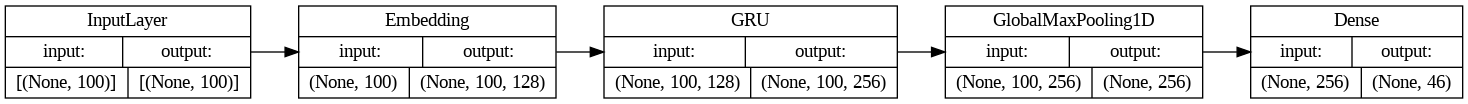

In [ ]:
# Generate a visualisations of the connections in rnn2 architecture
plot_model(rnn2, to_file='rnn2.png', show_shapes=True,show_layer_names=False, rankdir='LR')

**INTERPRETATION OF RNN RESULTS**

**rnn1:** This model uses a SimpleRNN layer with 32 neurons and a dense output layer with softmax activation. It achieves a training accuracy of 0.8846 and a validation accuracy of 0.4641.

**rnn2:** This model uses a GRU layer with 256 neurons, dropout of 0.9, and a GlobalMaxPooling1D layer followed by a dense output layer with softmax activation. It achieves a training accuracy of 0.7950 and a validation accuracy of 0.7435.

**rnn3:** This model uses the same architecture as rnn2, but with a different optimizer (rmsprop instead of adam). It achieves a training accuracy of 0.7570 and a validation accuracy of 0.7156.

**rnn4:** This model uses two GRU layers with 256 neurons each, dropout of 0.9, and a dense output layer with softmax activation. It achieves a training accuracy of 0.7886 and a validation accuracy of 0.7195.

**rnn5:** This model uses two LSTM layers, one with 128 neurons and the other with 64 neurons, dropout of 0.2, recurrent dropout of 0.2, and a dense output layer with softmax activation. It achieves a training accuracy of 0.6747 and a validation accuracy of 0.5993.

Among these models, **rnn2 has the highest validation accuracy**, suggesting that it is the best performing model among the five. However, we should note that we might need to improve the model further, as the validation accuracy is still not very high, indicating that the model might be overfitting the training data. We can also see that as the model complexity increases (i.e., from rnn1 to rnn4), the training accuracy generally increases, but the validation accuracy does not necessarily follow the same trend. This suggests that the more complex models might be overfitting the training data and not generalizing well to unseen data. Finally, we can see that the test accuracy is lower than the training and validation accuracy for all the models, which is expected since the models have not seen the test data during training and might not generalize well to it.

**ATTENTION MECHANISM**

The attention mechanism is a technique used in neural networks to selectively focus on **certain parts of the input sequence** while processing it. 

In traditional recurrent neural networks such as LSTM or GRU, the output at each time step depends on the entire input sequence seen so far. However, in many real-world problems, certain parts of the input sequence may be more relevant to the task at hand than others. Attention mechanisms allow the model to focus on these important parts of the input while ignoring the less important ones.

In [ ]:
# Define Attention and Memory

def attention_3d_block(hidden_states):
  # Shape of hidden_states is (batch_size, seqlen, LSTM size)
  hidden_size       = int(hidden_states.shape[2]) # LSTM size
  
  # Create a dense layer for the attention score and fetch out the last hidden state
  score_first_part  = Dense(hidden_size, use_bias=False, name='attention_score_vec')(hidden_states)
  h_t               = Lambda(lambda x: x[:, -1, :], output_shape=(hidden_size,), name='last_hidden_state')(hidden_states)
  # score_first_part shape: (batch_size, seqlen, LSTM size)
  # h_t shape: (batch_size, LSTM size)
  
  # Take the dot product of both, to get the final attention scores and push them through a softmax layer
  score             = dot([score_first_part, h_t], [2, 1], name='attention_score')
  attention_weights = Activation('softmax', name='attention_weight')(score)
  # score shape: (batch_size, seqlen)
  # attention_weights shape: (batch_size, seqlen)
  
  # Take a dot product again to create a context vector
  context_vector    = dot([hidden_states, attention_weights], [1, 1], name='context_vector')
  # context_vector shape: (batch_size, LSTM)
  
  # Add this context vector to h_t
  pre_activation    = concatenate([context_vector, h_t], name='attention_output')
  # pre_activation shape: (batch_size, LSTM*2)
  
  # And create a final dense layer
  attention_vector  = Dense(128, use_bias=False, activation='tanh', name='attention_vector')(pre_activation)
  # attention_vector shape: (batch_size, 128)

  return attention_vector

In [ ]:
# Define the rnn6 model

input_seq = Input(shape=(maxlen))
input_emb = Embedding(max_features, embedding_size)(input_seq)

# Important: since we need to hidden states in our attention layer, we set return_sequences=True
# return_sequences return the hidden state output for each input step
# return_state returns the hidden state output and cell state for the last input step

lstm = LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)(input_emb)
attention = attention_3d_block(lstm)

# We force all weights here to be positive to make visualization of the attention layer easier
dense = Dense(46, activation='softmax', use_bias=False, kernel_constraint=NonNeg())(Flatten()(attention))

rnn6 = Model(inputs=input_seq, outputs=dense)

rnn6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
rnn6.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - 31s 4ms/sample - loss: 2.5796 - accuracy: 0.3385 - val_loss: 2.0273 - val_accuracy: 0.4174
Epoch 2/20
7185/7185 [==============================] - 30s 4ms/sample - loss: 1.8366 - accuracy: 0.4848 - val_loss: 1.7634 - val_accuracy: 0.5220
Epoch 3/20
7185/7185 [==============================] - 29s 4ms/sample - loss: 1.6202 - accuracy: 0.5574 - val_loss: 1.6859 - val_accuracy: 0.5398
Epoch 4/20
7185/7185 [==============================] - 29s 4ms/sample - loss: 1.4775 - accuracy: 0.5933 - val_loss: 1.5992 - val_accuracy: 0.5787
Epoch 5/20
7185/7185 [==============================] - 30s 4ms/sample - loss: 1.3455 - accuracy: 0.6295 - val_loss: 1.5723 - val_accuracy: 0.6038
Epoch 6/20
7185/7185 [==============================] - 29s 4ms/sample - loss: 1.2461 - accuracy: 0.6525 - val_loss: 1.5106 - val_accuracy: 0.6188
Epoch 7/20
7185/7185 [==============================] - 29s 4ms/sample

In [ ]:
# Define the rnn7 model

input_seq = Input(shape=(maxlen))
input_emb = Embedding(max_features, embedding_size)(input_seq)

# Important: since we need to hidden states in our attention layer, we set return_sequences=True
# return_sequences return the hidden state output for each input step

gru = GRU(256, dropout=0.9, return_sequences=True)(input_emb)
attention = attention_3d_block(gru)

# We force all weights here to be positive to make visualization of the attention layer easier
dense = Dense(46, activation='softmax', use_bias=False)(Flatten()(attention))

rnn7 = Model(inputs=input_seq, outputs=dense)

rnn7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
rnn7.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - ETA: 0s - loss: 2.4776 - accuracy: 0.3716

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


7185/7185 [==============================] - 54s 7ms/sample - loss: 2.4776 - accuracy: 0.3716 - val_loss: 1.9502 - val_accuracy: 0.4385
Epoch 2/20
7185/7185 [==============================] - 51s 7ms/sample - loss: 1.8585 - accuracy: 0.4955 - val_loss: 1.7175 - val_accuracy: 0.5370
Epoch 3/20
7185/7185 [==============================] - 49s 7ms/sample - loss: 1.6900 - accuracy: 0.5585 - val_loss: 1.6160 - val_accuracy: 0.5776
Epoch 4/20
7185/7185 [==============================] - 48s 7ms/sample - loss: 1.5594 - accuracy: 0.5915 - val_loss: 1.5081 - val_accuracy: 0.6088
Epoch 5/20
7185/7185 [==============================] - 48s 7ms/sample - loss: 1.4230 - accuracy: 0.6295 - val_loss: 1.4328 - val_accuracy: 0.6311
Epoch 6/20
7185/7185 [==============================] - 47s 7ms/sample - loss: 1.3259 - accuracy: 0.6534 - val_loss: 1.3635 - val_accuracy: 0.6472
Epoch 7/20
7185/7185 [==============================] - 51s 7ms/sample - loss: 1.2183 - accuracy: 0.6813 - val_loss: 1.2698 - val

In [ ]:
# Define the rnn8 model

input_seq = Input(shape=(maxlen))
input_emb = Embedding(max_features, embedding_size)(input_seq)

# Important: since we need to hidden states in our attention layer, we set return_sequences=True
# return_sequences return the hidden state output for each input step

# First Bidirectional GRU layer
gru1 = Bidirectional(GRU(256, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))(input_emb)

# Second Bidirectional GRU layer
gru2 = Bidirectional(GRU(256, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))(gru1)

# Attention layer
attention = attention_3d_block(gru2)

# We force all weights here to be positive to make visualization of the attention layer easier
dense = Dense(46, activation='softmax', use_bias=False)(Flatten()(attention))

rnn8 = Model(inputs=input_seq, outputs=dense)

rnn8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
rnn8.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - 82s 11ms/sample - loss: 2.2275 - accuracy: 0.4111 - val_loss: 1.7610 - val_accuracy: 0.4997
Epoch 2/20
7185/7185 [==============================] - 73s 10ms/sample - loss: 1.6266 - accuracy: 0.5674 - val_loss: 1.6801 - val_accuracy: 0.5543
Epoch 3/20
7185/7185 [==============================] - 71s 10ms/sample - loss: 1.3527 - accuracy: 0.6443 - val_loss: 1.3967 - val_accuracy: 0.6327
Epoch 4/20
7185/7185 [==============================] - 71s 10ms/sample - loss: 1.1009 - accuracy: 0.7061 - val_loss: 1.3771 - val_accuracy: 0.6433
Epoch 5/20
7185/7185 [==============================] - 68s 10ms/sample - loss: 0.9081 - accuracy: 0.7599 - val_loss: 1.2909 - val_accuracy: 0.6784
Epoch 6/20
7185/7185 [==============================] - 68s 9ms/sample - loss: 0.8161 - accuracy: 0.7836 - val_loss: 1.4126 - val_accuracy: 0.6578
Epoch 7/20
7185/7185 [==============================] - 67s 9ms/s

In [ ]:
# Check the prediction
test_instance_idx = 0

newswire     = ' '.join([[k for k,v in reuters.get_word_index().items() if v == w][0] for w in X_test[test_instance_idx] if w > 0])
prediction = rnn7.predict(np.expand_dims(X_test[test_instance_idx], axis=0))[0][0]

print(newswire)
print('Predicted', prediction, '-- true label was:', y_test[test_instance_idx])

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


said of a 54 but 3 of a only generally political primarily date other under well a in british rate gain if demand at an div its taking report montreal systems were is and production had vs 000 7 issued year for 0 a in buffer rate loss may results tariffs dlrs is and from 39 s 000 for 3 cannot pre 50 east that in foods products opec last 1 fall change 1 approval in 15 2 said in opec 28 but for 3 cannot cts systems which is half be 6 of of said president amount pct dlrs
Predicted 0.02190926 -- true label was: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
get_attention_weights = K.function(inputs=input_seq, outputs=rnn7.get_layer(name='attention_weight').output)

# Apply a minmax as this makes visualization easier to see using the color map below
attention = np.expand_dims(
    minmax_scale(np.abs(get_attention_weights(
        np.expand_dims(X_test[test_instance_idx], axis=0)
    ))[0]
), axis=0)

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


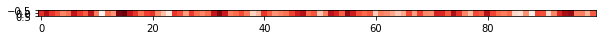

In [ ]:
cmap = cm.get_cmap('Reds')

plt.figure(figsize=(10,10))
plt.imshow(attention, cmap=cmap)

In [ ]:
text = ''
for i, w in enumerate(X_test[test_instance_idx]):
  word = [k for k,v in reuters.get_word_index().items() if v == w][0] if w != 0 else '-----'
  text += '<span style="background-color: {}">{}</span> '.format(rgb2hex(cmap(attention[0, i])[:3]), word)

HTML(text)

**FURTHER INTERPRETATION ON RNN**

Comparing the results of rnn2, rnn6, rnn7, and rnn8, we can see that rnn2 achieved the highest accuracy on the validation set with an accuracy of 0.7435, followed by rnn7 with an accuracy of 0.7295, rnn6 with an accuracy of 0.6711.Also, rnn2 had the lowest loss on the validation set of 1.1297, followed by rnn7 with a validation loss of 1.1676, rnn6 with a validation loss of 1.6341, and rnn8 with a validation loss of 1.7252.

Since rnn2 had the best performance, we can conclude that the addition of an attention mechanism did not provide much improvement in this case. However, this does not necessarily mean that attention mechanisms cannot improve the performance of the model, and it may be worthwhile to explore other attention mechanisms.

**USING DIFFERENT ATTENTION MECHANISM TECHNIQUE**

In [ ]:
# Define Attention and Memory with Additive Attention
def attention_additive_block(hidden_states):
  hidden_size = int(hidden_states.shape[2])
  score_first_part = Dense(hidden_size, use_bias=False, activation='tanh')(hidden_states)
  h_t = Lambda(lambda x: x[:, -1, :], output_shape=(hidden_size,))(score_first_part)
  score = dot([score_first_part, h_t], [2, 1])
  attention_weights = Activation('softmax')(score)
  context_vector = dot([hidden_states, attention_weights], [1, 1])
  attention_vector = Dense(128, use_bias=False, activation='tanh')(context_vector)
  return attention_vector

# Define the rnn9 model
input_seq = Input(shape=(maxlen))
input_emb = Embedding(max_features, embedding_size)(input_seq)

# First GRU layer
gru1 = GRU(512, dropout=0.5, return_sequences=True)(input_emb)

# Second GRU layer
gru2 = GRU(512, dropout=0.5, return_sequences=True)(gru1)

# Attention layer with Additive Attention
attention = attention_additive_block(gru2)

# We force all weights here to be positive to make visualization of the attention layer easier
dense = Dense(46, activation='softmax', use_bias=False)(Flatten()(attention))

rnn9 = Model(inputs=input_seq, outputs=dense)
rnn9.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
rnn9.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - 27s 4ms/sample - loss: 2.3818 - accuracy: 0.3688 - val_loss: 2.0175 - val_accuracy: 0.4485
Epoch 2/20
7185/7185 [==============================] - 22s 3ms/sample - loss: 1.7868 - accuracy: 0.5204 - val_loss: 1.6598 - val_accuracy: 0.5504
Epoch 3/20
7185/7185 [==============================] - 23s 3ms/sample - loss: 1.5812 - accuracy: 0.5776 - val_loss: 1.5378 - val_accuracy: 0.6110
Epoch 4/20
7185/7185 [==============================] - 23s 3ms/sample - loss: 1.3533 - accuracy: 0.6451 - val_loss: 1.4582 - val_accuracy: 0.6372
Epoch 5/20
7185/7185 [==============================] - 22s 3ms/sample - loss: 1.1919 - accuracy: 0.6834 - val_loss: 1.3677 - val_accuracy: 0.6611
Epoch 6/20
7185/7185 [==============================] - 22s 3ms/sample - loss: 1.0528 - accuracy: 0.7250 - val_loss: 1.4851 - val_accuracy: 0.6511
Epoch 7/20
7185/7185 [==============================] - 23s 3ms/sample

In [ ]:
# Define the rnn10 model
input_seq = Input(shape=(maxlen))
input_emb = Embedding(max_features, embedding_size)(input_seq)

# First GRU layer
gru1 = GRU(256, dropout=0.5, return_sequences=True)(input_emb)

# Second GRU layer
gru2 = GRU(256, dropout=0.5, return_sequences=True)(gru1)

# Attention layer with Additive Attention
attention = attention_additive_block(gru2)

# We force all weights here to be positive to make visualization of the attention layer easier
dense = Dense(46, activation='softmax', use_bias=False)(Flatten()(attention))

rnn10 = Model(inputs=input_seq, outputs=dense)
rnn10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
rnn10.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - 29s 4ms/sample - loss: 2.3888 - accuracy: 0.3706 - val_loss: 1.9334 - val_accuracy: 0.4508
Epoch 2/20
7185/7185 [==============================] - 22s 3ms/sample - loss: 1.7711 - accuracy: 0.5157 - val_loss: 1.6852 - val_accuracy: 0.5554
Epoch 3/20
7185/7185 [==============================] - 22s 3ms/sample - loss: 1.5776 - accuracy: 0.5748 - val_loss: 1.5981 - val_accuracy: 0.5760
Epoch 4/20
7185/7185 [==============================] - 20s 3ms/sample - loss: 1.4119 - accuracy: 0.6171 - val_loss: 1.5174 - val_accuracy: 0.6183
Epoch 5/20
7185/7185 [==============================] - 21s 3ms/sample - loss: 1.2157 - accuracy: 0.6792 - val_loss: 1.3590 - val_accuracy: 0.6566
Epoch 6/20
7185/7185 [==============================] - 23s 3ms/sample - loss: 1.0144 - accuracy: 0.7383 - val_loss: 1.3645 - val_accuracy: 0.6700
Epoch 7/20
7185/7185 [==============================] - 23s 3ms/sample

**2C. EXPERIMENTATION with CNN**

In [ ]:
# Define the CNN1 model architecture
cnn1 = Sequential([
    Embedding(max_features, embedding_size, input_length=maxlen),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(2),
    Conv1D(256, 5, activation='relu'),
    MaxPooling1D(2),
    Conv1D(512, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(46, activation='softmax')
])

# Compile the model
cnn1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
cnn1.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - ETA: 0s - loss: 2.2623 - accuracy: 0.3921

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


7185/7185 [==============================] - 13s 2ms/sample - loss: 2.2623 - accuracy: 0.3921 - val_loss: 1.8240 - val_accuracy: 0.4981
Epoch 2/20
7185/7185 [==============================] - 1s 103us/sample - loss: 1.7101 - accuracy: 0.5356 - val_loss: 1.6649 - val_accuracy: 0.5526
Epoch 3/20
7185/7185 [==============================] - 1s 104us/sample - loss: 1.4650 - accuracy: 0.5944 - val_loss: 1.5553 - val_accuracy: 0.5854
Epoch 4/20
7185/7185 [==============================] - 1s 104us/sample - loss: 1.2511 - accuracy: 0.6512 - val_loss: 1.5290 - val_accuracy: 0.6327
Epoch 5/20
7185/7185 [==============================] - 1s 109us/sample - loss: 1.0760 - accuracy: 0.6974 - val_loss: 1.6460 - val_accuracy: 0.6183
Epoch 6/20
7185/7185 [==============================] - 1s 105us/sample - loss: 0.9287 - accuracy: 0.7381 - val_loss: 1.6612 - val_accuracy: 0.6060
Epoch 7/20
7185/7185 [==============================] - 1s 104us/sample - loss: 0.8378 - accuracy: 0.7598 - val_loss: 1.7983

In [ ]:
# Define the CNN2 model architecture
cnn2 = Sequential([
    Embedding(max_features, embedding_size, input_length=maxlen),
    Conv1D(64, 5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),
    Conv1D(128, 5, activation='relu'),
    BatchNormalization(),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(46, activation='softmax')
])

# Compile the model
cnn2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
cnn2.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - ETA: 0s - loss: 2.7505 - accuracy: 0.4095

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


7185/7185 [==============================] - 9s 1ms/sample - loss: 2.7505 - accuracy: 0.4095 - val_loss: 3.7452 - val_accuracy: 0.0718
Epoch 2/20
7185/7185 [==============================] - 1s 79us/sample - loss: 1.6780 - accuracy: 0.5798 - val_loss: 3.8218 - val_accuracy: 0.0701
Epoch 3/20
7185/7185 [==============================] - 0s 69us/sample - loss: 1.2603 - accuracy: 0.6811 - val_loss: 3.8267 - val_accuracy: 0.0462
Epoch 4/20
7185/7185 [==============================] - 1s 71us/sample - loss: 0.9886 - accuracy: 0.7470 - val_loss: 3.8176 - val_accuracy: 0.0618
Epoch 5/20
7185/7185 [==============================] - 0s 69us/sample - loss: 0.7779 - accuracy: 0.8025 - val_loss: 3.7128 - val_accuracy: 0.0907
Epoch 6/20
7185/7185 [==============================] - 1s 73us/sample - loss: 0.6660 - accuracy: 0.8326 - val_loss: 2.9946 - val_accuracy: 0.5103
Epoch 7/20
7185/7185 [==============================] - 0s 67us/sample - loss: 0.5598 - accuracy: 0.8583 - val_loss: 2.3714 - val_

In [ ]:
# Define the CNN3 model architecture
cnn3 = Sequential([
    Embedding(max_features, embedding_size, input_length=maxlen),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(2),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(2),
    Conv1D(256, 5, activation='relu'),
    MaxPooling1D(2),
    Conv1D(512, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(46, activation='softmax')
])

# Compile the model
cnn3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
cnn3.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - ETA: 0s - loss: 2.4342 - accuracy: 0.3324

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


7185/7185 [==============================] - 7s 1ms/sample - loss: 2.4342 - accuracy: 0.3324 - val_loss: 2.0668 - val_accuracy: 0.3584
Epoch 2/20
7185/7185 [==============================] - 1s 134us/sample - loss: 1.9001 - accuracy: 0.4551 - val_loss: 1.8175 - val_accuracy: 0.5025
Epoch 3/20
7185/7185 [==============================] - 1s 99us/sample - loss: 1.5981 - accuracy: 0.5631 - val_loss: 1.6827 - val_accuracy: 0.5682
Epoch 4/20
7185/7185 [==============================] - 1s 95us/sample - loss: 1.4101 - accuracy: 0.6008 - val_loss: 1.6973 - val_accuracy: 0.5782
Epoch 5/20
7185/7185 [==============================] - 1s 90us/sample - loss: 1.2630 - accuracy: 0.6398 - val_loss: 1.6279 - val_accuracy: 0.6004
Epoch 6/20
7185/7185 [==============================] - 1s 88us/sample - loss: 1.1223 - accuracy: 0.6682 - val_loss: 1.6406 - val_accuracy: 0.6099
Epoch 7/20
7185/7185 [==============================] - 1s 109us/sample - loss: 1.0370 - accuracy: 0.6880 - val_loss: 1.8023 - va

In [ ]:
# Define the CNN4 model architecture
cnn4 = Sequential([
    Embedding(max_features, embedding_size, input_length=maxlen),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(2),
    Conv1D(256, 5, activation='relu'),
    MaxPooling1D(2),
    Conv1D(512, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(46, activation='softmax')
])

# Compile the model
cnn4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
cnn4.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7168/7185 [============================>.] - ETA: 0s - loss: 2.5605 - accuracy: 0.3895

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


7185/7185 [==============================] - 7s 907us/sample - loss: 2.5586 - accuracy: 0.3898 - val_loss: 1.9396 - val_accuracy: 0.5103
Epoch 2/20
7185/7185 [==============================] - 1s 118us/sample - loss: 1.8418 - accuracy: 0.5230 - val_loss: 1.7770 - val_accuracy: 0.5376
Epoch 3/20
7185/7185 [==============================] - 1s 106us/sample - loss: 1.5622 - accuracy: 0.5921 - val_loss: 1.6801 - val_accuracy: 0.5698
Epoch 4/20
7185/7185 [==============================] - 1s 105us/sample - loss: 1.3713 - accuracy: 0.6450 - val_loss: 1.6846 - val_accuracy: 0.6038
Epoch 5/20
7185/7185 [==============================] - 1s 106us/sample - loss: 1.1987 - accuracy: 0.6887 - val_loss: 1.6809 - val_accuracy: 0.6171
Epoch 6/20
7185/7185 [==============================] - 1s 105us/sample - loss: 1.0226 - accuracy: 0.7336 - val_loss: 1.7351 - val_accuracy: 0.6266
Epoch 7/20
7185/7185 [==============================] - 1s 105us/sample - loss: 0.8924 - accuracy: 0.7648 - val_loss: 1.828

In [ ]:
# Define the CNN5 model architecture
cnn5 = Sequential([
    Embedding(max_features, embedding_size, input_length=maxlen),
    Conv1D(32, 5, activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling1D(2),
    Dropout(0.5),
    Conv1D(64, 5, activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling1D(2),
    Dropout(0.5),
    GlobalMaxPooling1D(),
    Dense(46, activation='softmax')
])

# Compile the model
cnn5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
cnn5.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - 6s 820us/sample - loss: 2.7951 - accuracy: 0.3382 - val_loss: 2.7210 - val_accuracy: 0.4836
Epoch 2/20
7185/7185 [==============================] - 0s 66us/sample - loss: 2.0087 - accuracy: 0.5019 - val_loss: 2.2849 - val_accuracy: 0.5164
Epoch 3/20
7185/7185 [==============================] - 0s 60us/sample - loss: 1.8014 - accuracy: 0.5289 - val_loss: 2.1041 - val_accuracy: 0.5504
Epoch 4/20
7185/7185 [==============================] - 0s 59us/sample - loss: 1.6335 - accuracy: 0.5939 - val_loss: 1.9464 - val_accuracy: 0.6177
Epoch 5/20
7185/7185 [==============================] - 0s 63us/sample - loss: 1.4730 - accuracy: 0.6529 - val_loss: 1.9065 - val_accuracy: 0.6349
Epoch 6/20
7185/7185 [==============================] - 0s 60us/sample - loss: 1.3277 - accuracy: 0.6836 - val_loss: 1.8033 - val_accuracy: 0.6539
Epoch 7/20
7185/7185 [==============================] - 0s 61us/sampl

In [ ]:
# Define the CNN6 model architecture
cnn6 = Sequential([
    Embedding(max_features, embedding_size, input_length=maxlen),
    Conv1D(8, 5, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.2),
    Conv1D(16, 5, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling1D(2),
    GlobalMaxPooling1D(),
    Dropout(0.2),
    Dense(46, activation='softmax')
])

# Compile the model
cnn6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
cnn6.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - 11s 2ms/sample - loss: 4.5243 - accuracy: 0.1376 - val_loss: 3.7462 - val_accuracy: 0.2755
Epoch 2/20
7185/7185 [==============================] - 1s 146us/sample - loss: 2.5244 - accuracy: 0.4309 - val_loss: 3.7009 - val_accuracy: 0.3066
Epoch 3/20
7185/7185 [==============================] - 1s 124us/sample - loss: 2.0371 - accuracy: 0.5194 - val_loss: 3.7115 - val_accuracy: 0.3122
Epoch 4/20
7185/7185 [==============================] - 1s 134us/sample - loss: 1.7696 - accuracy: 0.5642 - val_loss: 3.7011 - val_accuracy: 0.3100
Epoch 5/20
7185/7185 [==============================] - 1s 140us/sample - loss: 1.5925 - accuracy: 0.6070 - val_loss: 3.6119 - val_accuracy: 0.3411
Epoch 6/20
7185/7185 [==============================] - 1s 137us/sample - loss: 1.4546 - accuracy: 0.6392 - val_loss: 3.4609 - val_accuracy: 0.4101
Epoch 7/20
7185/7185 [==============================] - 1s 103us/

**INTERPRETATION ON CNN RESULTS ON REUTERS DATASET**

**cnn1:** This model uses three convolutional layers, followed by two dense layers with a dropout layer in between. It achieved a training accuracy of 94.42% and validation accuracy of 65.55%.

**cnn2:** This model uses two convolutional layers, followed by a dense layer with a dropout layer in between. It also uses batch normalization between the convolutional and dense layers. It achieved a training accuracy of 95.00% and validation accuracy of 70.06%.

**cnn3:** This model uses four convolutional layers, followed by three dense layers with two dropout layers in between. It achieved a training accuracy of 87.92% and validation accuracy of 65.89%.

**cnn4:** This model uses three convolutional layers, followed by one dense layer with a dropout layer in between. It also uses L2 regularization on the dense layer. It achieved a training accuracy of 93.31% and validation accuracy of 67.00%.

**cnn5:** This model uses two convolutional layers with L2 regularization, followed by a dense layer with a dropout layer in between. It achieved a training accuracy of 90.79% and validation accuracy of 67.84%.

**cnn6:** This model uses two convolutional layers, followed by one dense layer with a dropout layer in between. It also uses batch normalization between the convolutional and dense layers. It achieved a training accuracy of 84.41% and validation accuracy of 67.28%.

Although all models have achieved an accuracy above 65%, there is still room for improvement and cnn2 has the highest validation accuracy. Some possible techniques to try are adjusting the hyperparameters (such as learning rate, batch size, and number of epochs), using different activation functions or regularization methods, or trying a different model architecture altogether, such as a recurrent neural network (RNN) or transformer-based models.